# Integración Numérica
## Regla de Simpson


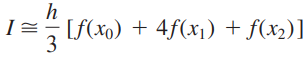

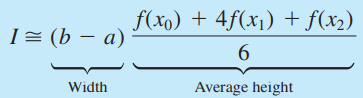

## Error:

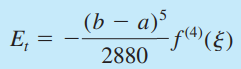

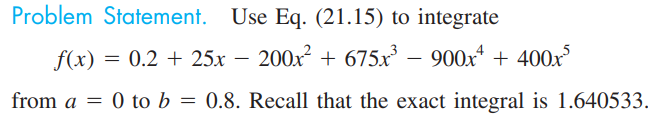

In [43]:
f=lambda x:0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5

In [45]:
a,b=0,0.8
#Se define un vector con los tres puntos
h=(b-a)/2
x=[a,a+h,b]
I=(1/6)*(b-a)*(f(x[0])+4*f(x[1])+f(x[2]))
print(I)

1.3674666666666742


In [46]:
#Cálculo de los errores:
Et=1.640533-I
#Para el Error estimado (o aproximado), recuerde calcular la funcion promedio
#de la cuarta derivada, este valor es -2400:
Ea=-(b-a)**5*(-2400)/2880
print(Et,Ea)

0.27306633333332586 0.27306666666666674


## Aplicación Múltiple de la Regla de Simpson

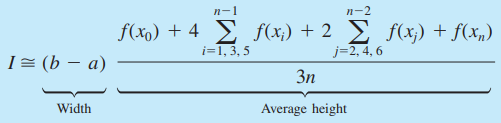

##Error:
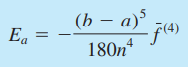

<p>Debe haber un número <strong>Par </strong> de segmentos</p>
<p>Resuelva el ejercicio anterior con $n=4$</p>

In [ ]:
n,h=4,0.2
a,b=0,0.8
print(f'f(0)={f(0)}, f(0.2)={f(0.2)},f(0.4)={f(0.4)},f(0.6)={f(0.6)},f(0.8)={f(0.8)}')

f(0)=0.2, f(0.2)=1.2879999999999996,f(0.4)=2.4560000000000004,f(0.6)=3.4639999999999773,f(0.8)=0.23200000000005616


In [ ]:
x=[]
x.append(a)
for i in range(1,n+1):
  x.append(a+i*h)
x


[0, 0.2, 0.4, 0.6000000000000001, 0.8]

In [ ]:
#Aplicar la Formula de Simpson 1/3:
I=(1/(3*n))*(b-a)*(f(x[0])+4*(f(x[1])+f(x[3]))+2*(f(x[2]))+f(x[4]))I

1.6234666666666717

In [ ]:
#Calculo del error total Et:
Et=1.640533-I
Er=abs(Et/I)*100
Ea=-1*(b-a)**5*(-2400)/(180*n**4) #Error estimado
print(f'Et={Et},Er={Er}%, Ea={Ea}')

Et=0.0170663333333283,Er=1.0512278252296472%, Ea=0.01706666666666667


## Ejercicios de Integración Numérica

<p>Resuelva los ejercicios por:<br>
i)	el método del trapecio,<br>
ii)	el método del trapecio compuesto, realizando una función que itere hasta que el error relativo con el valor real (se puede ingresar este evaluándolo de forma analítica) sea menor al 1%.<br>
iii)	Por la regla de Simpson simple.<br>

iv)	Por la regla de Simpson compuesta. </p>
<p>En todos los casos estime el error, de forma manual.</p>

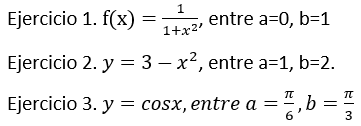

#Ecuaciones Diferenciales

Se resuelven e.d.o. de la forma:

<p>$\frac{dy}{dx}=f(t,y) $</p>

<p>En estos problemas, se plantea una solución como:</p>
<p>$Nuevo Valor = Valor Anterior + pendiente × (tamaño paso)$</p>
<p>$y_{i+1} =y_i + \phi × h$</p>
<p>donde la pendiente $\phi$ es llamada una <i>función de incremento</i></p>

##Método de euler

<p>La primera derivada provee un estimado directo de la pendiente en $t_i$</p>
<p>$\phi=f(t,y)$</p>
<p>$y_{i+1} =y_i + f(t_i,y_i) × h$</p>


##Ejemplo

<p>Use el método de Euler para integrar<br>
$y' = 4e^{0.8t}-0.5y$<br>
desde $t=0$ hasta $t=4$ con un tamaño de paso de 1, ($h=1$).</p>
<p> La condición inicial en $t=0$ es $y=2$.</p>

<p>Solución. Al implementar el método de Euler, se tiene:</p>
<p>$y(1)=y(0)+f(0,2)*(1)$</p>
<p>donde $y(0)=2$ y la pendiente estimada en $t=0$, es:</p>


In [4]:
import numpy as np
f=lambda t,y:4*np.exp(0.8*t)-0.5*y
#También se toma ft como la solución verdadera, que resuelta de forma analítica, es: 
ft=lambda t:(4/1.3)*(np.exp(0.8*t)-np.exp(-0.5*t))+2*np.exp(-0.5*t)

In [5]:
#Se evalúa f(t,y) en la condición inicial:y(0)=2:
f(0,2)

3.0

In [34]:
#Definiendo el paso y los vectores según:
h=1 #Paso
t=[]  #Vector para el tiempo
y=[]  #Vector para la solución encontrada por Euler en cada paso
yt=[] #Vector para la solución verdadera con ft
et=[] #Vector para el error verdadero en cada paso

In [35]:
#Primer paso
t.append(0)
y.append(2)
yt.append(2)
et.append(0)
yn=y[0]+f(t[0],y[t[0]])*h
y.append(yn)
yt.append(ft(t[0]+1))
print(f't:{t}, y:{y},yTrue:{yt}')
et.append(100*abs(yt[1]-y[1])/yt[1])
print(et,"%")


t:[0], y:[2, 5.0],yTrue:[2, 6.194631377209372]
[0, 19.284946988202282] %


In [36]:
#Segundo paso:
t.append(1)
yn=y[1]+f(t[1],y[t[1]])*h
y.append(yn)
yt.append(ft(t[1]+1))
print(y,"True:",yt)
et.append(100*abs(yt[2]-y[2])/yt[2])
print(et,"%")

[2, 5.0, 11.402163713969871] True: [2, 6.194631377209372, 14.84392190764649]
[0, 19.284946988202282, 23.186312991202676] %


In [37]:
#Tercer paso:
t.append(2)
yn=y[2]+f(t[2],y[t[2]])*h
y.append(yn)
yt.append(ft(t[2]+1))
print(y,"True:",yt)
et.append(100*abs(yt[3]-y[3])/yt[3])
print(et,"%")

[2, 5.0, 11.402163713969871, 25.513211554565395] True: [2, 6.194631377209372, 14.84392190764649, 33.67717176796817]
[0, 19.284946988202282, 23.186312991202676, 24.24182253085716] %


In [38]:
#Cuarto paso:
t.append(3)
yn=y[3]+f(t[3],y[t[3]])*h
y.append(yn)
yt.append(ft(t[3]+1))
print(y)
print("True:",yt)
et.append(100*abs(yt[4]-y[4])/yt[4])
print(et,"%")
#Como ya se tiene t=4, se agrega este elemento:
t.append(4)

[2, 5.0, 11.402163713969871, 25.513211554565395, 56.84931129984912]
True: [2, 6.194631377209372, 14.84392190764649, 33.67717176796817, 75.33896260915857]
[0, 19.284946988202282, 23.186312991202676, 24.24182253085716, 24.541951029017433] %


In [39]:
print(t,y,yt,et)

[0, 1, 2, 3, 4] [2, 5.0, 11.402163713969871, 25.513211554565395, 56.84931129984912] [2, 6.194631377209372, 14.84392190764649, 33.67717176796817, 75.33896260915857] [0, 19.284946988202282, 23.186312991202676, 24.24182253085716, 24.541951029017433]


In [41]:
##Imprimir tabla de resultados:
print('-----------------------------------------------------')
print(' t\t y Euler\t y verd\t Error')
print('-----------------------------------------------------')
i=0
while i <= 4:
  print('{0:1.0f}'.format(t[i]), '\t', '{0:1.6f}'.format(y[i]),'{0:1.6f}'.format(yt[i]), '\t', '{0:1.6e}'.format(et[i]))
  i+=1
print('-----------------------------------------------------')

-----------------------------------------------------
 t	 y Euler	 y verd	 Error
-----------------------------------------------------
0 	 2.000000 2.000000 	 0.000000e+00
1 	 5.000000 6.194631 	 1.928495e+01
2 	 11.402164 14.843922 	 2.318631e+01
3 	 25.513212 33.677172 	 2.424182e+01
4 	 56.849311 75.338963 	 2.454195e+01
-----------------------------------------------------


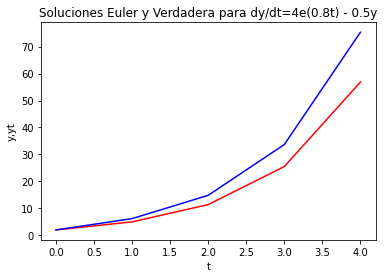

In [28]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Podemos encadenar la representación de múltiples funciones en el mismo gráfico.
# En este orden: Grafico 1: array t, y, 'r' el color rojo (red) para sln Euler; 
# Gráfico 2: array t, yt, 'b' azul (blue) para la solución verdadera
plt.plot(t, y, 'r', t,yt, 'b')

plt.xlabel('t')
plt.ylabel('y,yt')
plt.title('Soluciones Euler y Verdadera para dy/dt=4e(0.8t) - 0.5y')

# Finalmente mostramos el gráfico
plt.show()

#Ejercicio

<p>Resuelva con estos procedimientos el ejercicio planteado en la guía:</p>
<p>$\frac{dy}{dx}=y-t^2+1; y(0)=0.5 $</p>
<p>para $0 \le t\le 2$ con $h=0.5$</p>
<p>Para encontrar la solución verdadera puede utilizar dsolve en Matlab</p>
